In [1]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

from collections import OrderedDict

import numpy as np
import time

import torch
from torch import nn
from torch import optim
import torch.nn.functional as F

import helper

In [2]:
x = torch.randn(2,2 , requires_grad=True)
print(x)

tensor([[ 1.7098,  0.1474],
        [ 0.1967, -0.4332]], requires_grad=True)


In [3]:
y = x**2
print(y)

tensor([[2.9236, 0.0217],
        [0.0387, 0.1876]], grad_fn=<PowBackward0>)


In [4]:
print(y.grad_fn)

In [5]:
z = y.mean()
z

tensor(0.7929, grad_fn=<MeanBackward1>)

In [6]:
print(x.grad)

None


In [7]:
z.backward()
print(x.grad)

tensor([[ 0.8549,  0.0737],
        [ 0.0984, -0.2166]])


## Get data and define the network

In [9]:
from torchvision import datasets, transforms

# define transform to normalize the data
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5, 0.5), (0.5, 0.5, 0.5, 0.5))
])

# download and load the data
trainset = datasets.MNIST('MNIST_data', download=True, train=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

In [10]:
# networks hyperparameters
input_size = 784
hidden_size = [128, 64]
output_size = 10

# Build a feed-forward network
model = nn.Sequential(OrderedDict([
    ('fc1', nn.Linear(input_size, hidden_size[0])),
    ('relu1', nn.ReLU()),
    ('fc2', nn.Linear(hidden_size[0], hidden_size[1])),
    ('relu2', nn.ReLU()),
    ('logits', nn.Linear(hidden_size[1], output_size))
]))

## Training the networks

In [11]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)

In [12]:
print('initial weights: ', model.fc1.weight)

images, labels = next(iter(trainloader))
images.resize_(64, 784)

# clear the gradients because gradients are cummulated
optimizer.zero_grad()

output = model.forward(images)
loss = criterion(output, labels)
loss.backward()
print('Gradient - ', model.fc1.weight.grad)
optimizer.step()

initial weights:  Parameter containing:
tensor([[-0.0076,  0.0081, -0.0021,  ...,  0.0244,  0.0156,  0.0152],
        [-0.0048,  0.0352,  0.0322,  ...,  0.0158,  0.0027,  0.0219],
        [ 0.0048,  0.0266,  0.0010,  ..., -0.0161,  0.0324, -0.0132],
        ...,
        [-0.0181,  0.0332,  0.0150,  ...,  0.0013, -0.0225, -0.0173],
        [ 0.0344, -0.0085, -0.0262,  ...,  0.0322,  0.0319,  0.0222],
        [-0.0233, -0.0353, -0.0305,  ..., -0.0060,  0.0021, -0.0202]],
       requires_grad=True)
Gradient -  tensor([[ 0.0004,  0.0004,  0.0004,  ...,  0.0004,  0.0004,  0.0004],
        [-0.0041, -0.0041, -0.0041,  ..., -0.0041, -0.0041, -0.0041],
        [ 0.0010,  0.0010,  0.0010,  ...,  0.0010,  0.0010,  0.0010],
        ...,
        [ 0.0047,  0.0047,  0.0047,  ...,  0.0047,  0.0047,  0.0047],
        [-0.0015, -0.0015, -0.0015,  ..., -0.0015, -0.0015, -0.0015],
        [-0.0037, -0.0037, -0.0037,  ..., -0.0037, -0.0037, -0.0037]])


In [14]:
print('updated weights: ', model.fc1.weight)

updated weights:  Parameter containing:
tensor([[-0.0076,  0.0081, -0.0021,  ...,  0.0244,  0.0156,  0.0152],
        [-0.0048,  0.0352,  0.0323,  ...,  0.0158,  0.0028,  0.0220],
        [ 0.0047,  0.0266,  0.0010,  ..., -0.0161,  0.0324, -0.0132],
        ...,
        [-0.0182,  0.0331,  0.0150,  ...,  0.0013, -0.0225, -0.0174],
        [ 0.0344, -0.0085, -0.0262,  ...,  0.0322,  0.0319,  0.0222],
        [-0.0233, -0.0353, -0.0304,  ..., -0.0060,  0.0021, -0.0201]],
       requires_grad=True)


## Training with looping

In [15]:
optimizer = optim.SGD(model.parameters(), lr=0.003)

In [16]:
epochs = 3
print_every = 40
steps = 0

for e in range(epochs):
    running_loss = 0
    for images, labels in iter(trainloader):
        steps += 1
        # flatten mnist images to 784 long vector
        images.resize_(images.size()[0], 784)
        
        optimizer.zero_grad()
        
        # forward and backward pass
        output = model.forward(images)
        loss = criterion(output, labels)
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item()
        
        if steps % print_every == 0:
            print("Epoch: {}/{}... ".format(e+1, epochs),
                  "Loss: {:.4f}".format(running_loss/print_every))
            
            running_loss = 0

Epoch: 1/3...  Loss: 2.2913
Epoch: 1/3...  Loss: 2.2635
Epoch: 1/3...  Loss: 2.2409
Epoch: 1/3...  Loss: 2.2187
Epoch: 1/3...  Loss: 2.1943
Epoch: 1/3...  Loss: 2.1610
Epoch: 1/3...  Loss: 2.1296
Epoch: 1/3...  Loss: 2.0935
Epoch: 1/3...  Loss: 2.0502
Epoch: 1/3...  Loss: 2.0021
Epoch: 1/3...  Loss: 1.9683
Epoch: 1/3...  Loss: 1.9081
Epoch: 1/3...  Loss: 1.8616
Epoch: 1/3...  Loss: 1.7903
Epoch: 1/3...  Loss: 1.7470
Epoch: 1/3...  Loss: 1.6701
Epoch: 1/3...  Loss: 1.6161
Epoch: 1/3...  Loss: 1.5376
Epoch: 1/3...  Loss: 1.4652
Epoch: 1/3...  Loss: 1.4023
Epoch: 1/3...  Loss: 1.3071
Epoch: 1/3...  Loss: 1.2611
Epoch: 1/3...  Loss: 1.1874
Epoch: 2/3...  Loss: 0.6061
Epoch: 2/3...  Loss: 1.0872
Epoch: 2/3...  Loss: 1.0399
Epoch: 2/3...  Loss: 1.0156
Epoch: 2/3...  Loss: 0.9522
Epoch: 2/3...  Loss: 0.9224
Epoch: 2/3...  Loss: 0.8809
Epoch: 2/3...  Loss: 0.8586
Epoch: 2/3...  Loss: 0.8248
Epoch: 2/3...  Loss: 0.8064
Epoch: 2/3...  Loss: 0.7739
Epoch: 2/3...  Loss: 0.7627
Epoch: 2/3...  Loss:

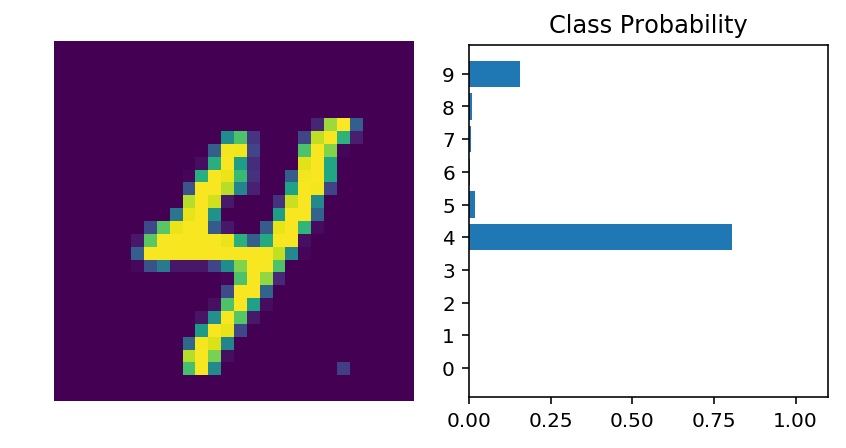

In [17]:
images, labels = next(iter(trainloader))

img = images[0].view(1,784)
# turn off gradients to speed up
with torch.no_grad():
    logits = model.forward(img)

# output of the network are logits, need to take softmax for probabilites
ps = F.softmax(logits, dim=1)
helper.view_classify(img.view(1,28,28), ps)